# Pandas
La libreria Pandas (https://pandas.pydata.org) è una libreria scritta in linguaggio Python pensata per la manipolazione e l'analisi dei dati.

Pandas utilizza NumPy come “motore numerico” per eseguire tutte le operazioni su dati numerici. NumPy (Numerical Python) è una libreria per il calcolo scientifico in Python, offre array multidimensionali ad alte prestazioni, funzioni matematiche/statistiche che possono essere applicate in modo efficiente su array di grandi dimensioni e vari strumenti di algebra lineare. Rispetto alle liste native di Python offre molte più funzionalità ed è molto più veloce in termini computazionali.

Può essere installata tramite il gestore di pacchetti pip con l'istruzione pip install pandas.
Una volta installata, tipicamente si importa con il comando import pandas as pd.

**Pandas non è una libreria per gestire big data**, presenta problemi di scalabilità in quanto processa i dati su single core, quindi non supporta in alcun modo distribuzione e parallelismo. Però la maggior parte dei framework e delle librerie di big data analysis sono ispirate a Pandas (che rappresenta uno standard de facto in ambito data analysis), quindi per iniziare è utile prendere familiarità con questa libreria. È molto utilizzata per fare Exploratory Data Analysis (che tratteremo in seguito), su un laptop moderno funziona bene fino a 1-2 milioni di record.

Questa libreria è basata sul concetto di dataframe. Un dataframe è una struttura bidimensionale (sostanzialmente una tabella), dove è presente un indice di riga e un indice di colonna. Combinando indici di riga e di colonna è possibile accedere ai singoli valori del dataframe. I valori presenti negli indici devono essere univoci, non si possono avere due valori di indice (riga o colonna) uguali.

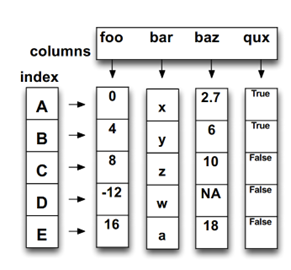

Ogni colonna ha associato un tipo di dato. Gli elementi di una colonna o di una riga vengono restituiti con un oggetto iterabile di tipo Series che contiene i valori, il tipo di dato, il nome dell’attributo e l’indice (di colonna o riga) associato ad ogni valore.

In [1]:
import pandas as pd

## Creare un dataframe

Un dataframe può essere creato con l’istruzione `pd.DataFrame(data, [index=index, column=column)`, solo i dati sono obbligatori, se non si fornisce un indice o delle colonne la libreria le numererà automaticamente partendo da 0. I dati possono essere in vari formati iterabili, ad esempio una matrice, un array, un dizionario. È possibile avere più informazioni sulla documentazione ufficiale https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [2]:
df = pd.DataFrame([["Mario Rossi", "Modena", 30], ["Giuseppe Verdi", "Bologna", 28], ["Maria Bianchi", "Milano", 29]], columns=["Nominativo", "Residenza", "Età"])

df

,Nominativo,Residenza,Età
0,Mario Rossi,Modena,30
1,Giuseppe Verdi,Bologna,28
2,Maria Bianchi,Milano,29


## Scrivere un dataframe su disco

Un dataframe può essere salvato in vari formati.

Esempio CSV

In [5]:
df.to_csv('utenti.csv', sep=";") # Di default scrive l'indice

In [6]:
df.to_csv('utenti.csv', sep=";", index=None) # Così non lo scrive

Esempio JSON

In [8]:
# Di default crea un unico oggetto
df.to_json('utenti.json')

In [11]:
# Un formato molto usato è scriverlo come elenco di oggetti
df.to_json('utenti.json', lines=True, index=None, orient='records')

Esempio parquet

Per usare i parquet serve che sia installata una delle librerie
*pyarrow* o *fastparquet*.

Su Colab sono già pre-installate, si possono sempre installare con pip install ...

In [12]:
df.to_parquet('utenti.parquet')

## Creare un dataframe caricando dati da disco

Rileggiamo i valori che abbiamo scritto.

Per il CSV il separatore di default è la virgola, abbiamo personalizzato con ';' va specificato anche in lettura, sennò carica male i dati.

In [15]:
df = pd.read_csv('utenti.csv')
df

,Nominativo;Residenza;Età
0,Mario Rossi;Modena;30
1,Giuseppe Verdi;Bologna;28
2,Maria Bianchi;Milano;29


In [16]:
df = pd.read_csv('utenti.csv', sep=";")
df

,Nominativo,Residenza,Età
0,Mario Rossi,Modena,30
1,Giuseppe Verdi,Bologna,28
2,Maria Bianchi,Milano,29


Anche per il JSON è necessario specificare che stiamo leggendo un file che contiene tanti JSONObject per ogni riga.

In questo caso se omesso dà errore.

In [17]:
df = pd.read_json('utenti.json')

ValueError: Trailing data

In [19]:
df = pd.read_json('utenti.json', lines=True)
df

,Nominativo,Residenza,Età
0,Mario Rossi,Modena,30
1,Giuseppe Verdi,Bologna,28
2,Maria Bianchi,Milano,29


Possiamo ricaricare anche il parquet

In [21]:
df = pd.read_parquet('utenti.parquet')
df

,Nominativo,Residenza,Età
0,Mario Rossi,Modena,30
1,Giuseppe Verdi,Bologna,28
2,Maria Bianchi,Milano,29


Come abbiamo visto nella teoria il formato Parquet offre la possibilità di caricare solo alcune colonne. Per esempio, carichiamo solo il nominativo e la residenza

In [23]:
df = pd.read_parquet('utenti.parquet', columns=['Nominativo', 'Residenza'])
df

,Nominativo,Residenza
0,Mario Rossi,Modena
1,Giuseppe Verdi,Bologna
2,Maria Bianchi,Milano


## Proprietà di un dataframe

Un dataframe ha delle proprietà (attributi) base che possono essere accedute tramite la notazione df.proprietà, dove df è una variabile associata al dataframe.
Tra le proprietà più utili abbiamo:


In [89]:
df = pd.read_csv('utenti.csv', sep=";")
df

,Nominativo,Residenza,Età
0,Mario Rossi,Modena,30
1,Giuseppe Verdi,Bologna,28
2,Maria Bianchi,Milano,29


dtypes: mostra il tipo di dato associato ad ogni colonna;

In [90]:
df.dtypes

,0
Nominativo,object
Residenza,object
Età,int64


columns: ritorna nomi delle colonne;

In [91]:
df.columns

Index(['Nominativo', 'Residenza', 'Età'], dtype='object')

index: ritorna i valori contenuti nell’indice di riga;


In [92]:
df.index

RangeIndex(start=0, stop=3, step=1)

axes: ritorna un array dove nella posizione 0 sono contenuti i valori dell’indice di riga e nella posizione 1 i nomi delle colonne;

In [93]:
df.axes

[RangeIndex(start=0, stop=3, step=1),
 Index(['Nominativo', 'Residenza', 'Età'], dtype='object')]

size: ritorna il numero di celle contenute nel dataframe

In [94]:
df.size

9

shape: ritorna una tupla contenente il numero di righe e il numero di colonne.

In [95]:
df.shape

(3, 3)

values: ritorna una matrice contenente i dati, senza indici e nomi di colonna.

In [96]:
df.values

array([['Mario Rossi', 'Modena', 30],
       ['Giuseppe Verdi', 'Bologna', 28],
       ['Maria Bianchi', 'Milano', 29]], dtype=object)

Il formato di questa matrice è quello della libreria NumPy. NumPy è una libreria di Python per manipolare in modo efficiente array numerici anche di grandi dimensioni.

In [97]:
type(df.values)

numpy.ndarray

## Impostare l’indice di un dataframe
L’indice di un dataframe può essere impostato facendo `dataframe.set_index(colonne)` dove colonne sono le colonne che si vogliono impostare come indice.

Di default Pandas usa un indice numerico crescente che enumera ogni riga (quindi 0, 1, 2, …, n).


In [98]:
df1 = df.set_index(['Nominativo'])
df1

,Residenza,Età
Nominativo,,
Mario Rossi,Modena,30
Giuseppe Verdi,Bologna,28
Maria Bianchi,Milano,29


Se si vuole modificare direttamente il dataframe si può fare

In [99]:
df.set_index(['Nominativo'], inplace=True)
df

,Residenza,Età
Nominativo,,
Mario Rossi,Modena,30
Giuseppe Verdi,Bologna,28
Maria Bianchi,Milano,29


Si può resettare l'indice con reset_index().

Anche in questo caso si può aggiungere *inplace=True* per modificare direttamente il dataframe.

In [100]:
df.reset_index(inplace=True)
df

,Nominativo,Residenza,Età
0,Mario Rossi,Modena,30
1,Giuseppe Verdi,Bologna,28
2,Maria Bianchi,Milano,29


## Selezionare colonne
Possiamo estrarre i valori di una colonna con `df['nome colonna']` , questa istruzione ritorna un oggetto di tipo Series contenente tutti i dati di quella colonna.

Si può accedere ai valori della serie trasformandoli in un array Numpy con la proprietà .values esattamente come per un dataframe.

In [101]:
df['Età']

,Età
0,30
1,28
2,29


In [102]:
df['Età'].values

array([30, 28, 29])


Attenzione questo metodo di accesso è case sensitive, quindi bisogna scrivere il nome della colonna esattamente come è scritto nel dataframe.

In [103]:
df['età']

KeyError: 'età'

Si può anche creare un dataframe più piccolo selezionando più colonne, per selezionare più colonne bisogna passare un array invece che una stringa al metodo di selezione.


In [104]:
df[['Età', 'Residenza']]

,Età,Residenza
0,30,Modena
1,28,Bologna
2,29,Milano


# Selezionare righe

Le righe possono essere selezionate sulla base della loro posizione utilizzando lo slicing con i "n1:n2", dove n1 è il numero di riga iniziale da prendere, n2 è il numero di riga finale che però non viene incluso, quindi include `[n1, …, n2[`.

Si dice che questo tipo di slicing è esclusivo perché esclude l’ultimo elemento.


Questo è totalmente indipendente dall’indice, dipende solo dall’ordinamento dei dati nel dataframe.

In [105]:
df

,Nominativo,Residenza,Età
0,Mario Rossi,Modena,30
1,Giuseppe Verdi,Bologna,28
2,Maria Bianchi,Milano,29


In [106]:
df[0:1]

,Nominativo,Residenza,Età
0,Mario Rossi,Modena,30


Il metodo `iloc(righe [, colonne])` funziona esattamente come lo slicing classico, quindi è esclusivo e prende gli elementi in base alla loro posizione.

In colonne se non viene inserito nulla prende tutte le colonne, altrimenti è possibile inserire la posizione delle colonne che si vogliono prendere.

In [107]:
df.iloc[0:1]

,Nominativo,Residenza,Età
0,Mario Rossi,Modena,30


In [111]:
df.iloc[0:1, 0:2]

,Nominativo,Residenza
0,Mario Rossi,Modena


Il metodo `loc(righe [,colonne])` consente di selezionare un sottoinsieme di righe/colonne (opzionali) sulla base del valore di indice. A differenza di iloc è inclusivo, quindi seleziona anche l’ultimo valore

In [112]:
df.loc[0:1, ["Nominativo", "Residenza"]]

,Nominativo,Residenza
0,Mario Rossi,Modena
1,Giuseppe Verdi,Bologna


## Filtrare le righe di un dataframe

È possibile filtrare le righe di un dataframe applicando condizioni booleane sui campi che lo compongono.
Le condizioni possono essere espresse sui singoli campi utilizzando gli operatori binari == (uguale), > (maggiore), >= (maggiore uguale), < (minore), <= (minore uguale), != (diverso).

Più condizioni possono essere messe insieme combinandole in and (&), or (|) e negate (~).


Persone con più di 28 anni


In [114]:
df[df['Età'] > 28]

,Nominativo,Residenza,Età
0,Mario Rossi,Modena,30
2,Maria Bianchi,Milano,29


Persone con più di 28 anni che risiedono a Modena

In [115]:
df[(df['Età'] > 28) & (df['Residenza'] == 'Modena')]

,Nominativo,Residenza,Età
0,Mario Rossi,Modena,30


Persone che non risiedono a Modena

In [116]:
df[~(df['Residenza'] == 'Modena')]

,Nominativo,Residenza,Età
1,Giuseppe Verdi,Bologna,28
2,Maria Bianchi,Milano,29


Oppure

In [118]:
df[df['Residenza'] != 'Modena']

,Nominativo,Residenza,Età
1,Giuseppe Verdi,Bologna,28
2,Maria Bianchi,Milano,29
